In [3]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data1 = pd.read_csv('kc-house-data.csv')

In [24]:
data2 = pd.read_csv('laptop_price.csv', encoding='latin-1')

In [4]:
data1.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


1.2. Изучите стоимости недвижимости

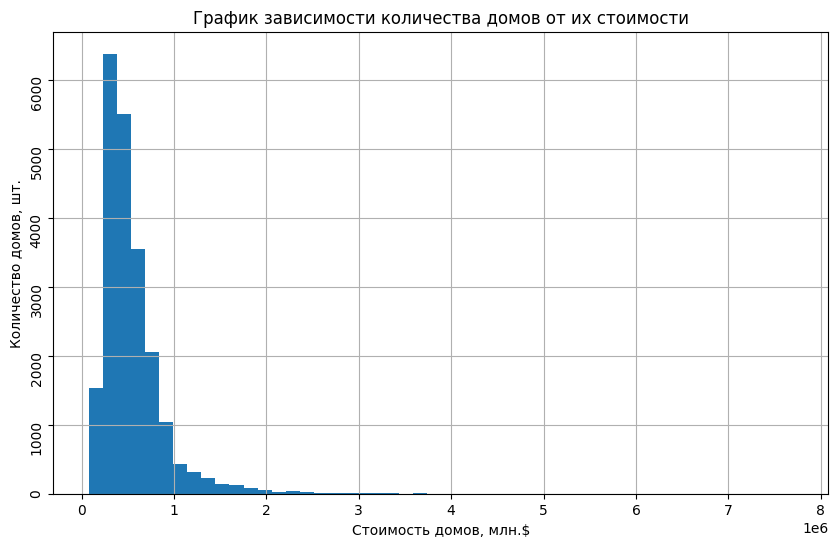

In [12]:
plt.figure(figsize=(10, 6))
data = data1.groupby('price')['yr_built'].agg(count = 'count').reset_index().sort_values(by='price')
# plt.plot(data['price']*0.001, data['count'])
# sns.barplot(x = data['price'], y = data['count'])
plt.hist(data1['price'], bins=50)
plt.xlabel('Стоимость домов, млн.$')
plt.ylabel('Количество домов, шт.')
plt.title('График зависимости количества домов от их стоимости')
plt.grid()
# plt.xticks(rotation = 90)
plt.yticks(rotation = 90);

Вывод: основную долю составляют дома стоимостью до 1000000$, остальное является выбросами.

1.3. Изучите распределение квадратуры жилой

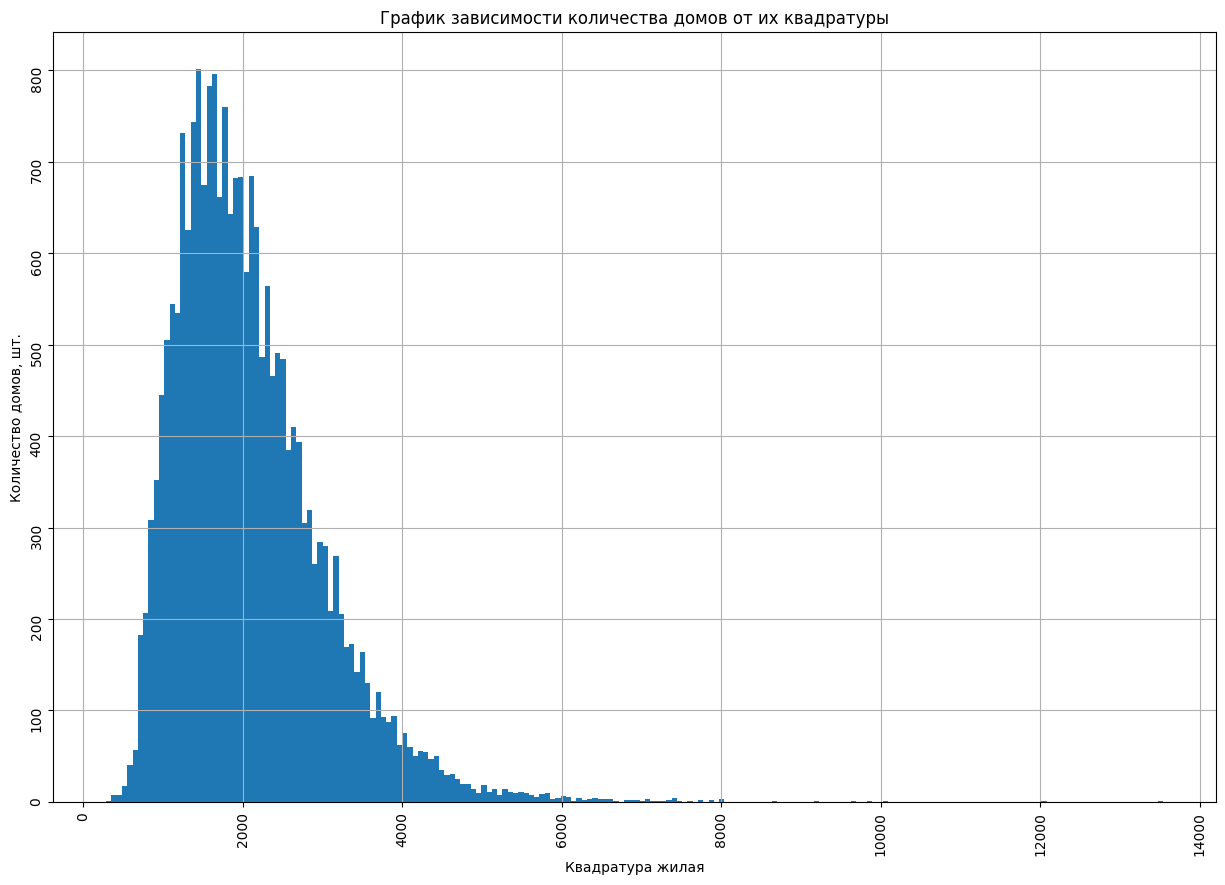

In [57]:
plt.figure(figsize=(15, 10))
# data = data1.groupby('sqft_living')['yr_built'].agg(count = 'count').reset_index().sort_values(by='sqft_living')
# plt.plot(data['sqft_living'], data['count'])
plt.hist(data1['sqft_living'], bins=200)
plt.xlabel('Квадратура жилая')
plt.ylabel('Количество домов, шт.')
plt.title('График зависимости количества домов от их квадратуры')
plt.grid()
plt.xticks(rotation = 90)
plt.yticks(rotation = 90);

Вывод: большинство домов имеет жилую квадратуру от 400 до 3100.

1.4. Изучите распределение года постройки

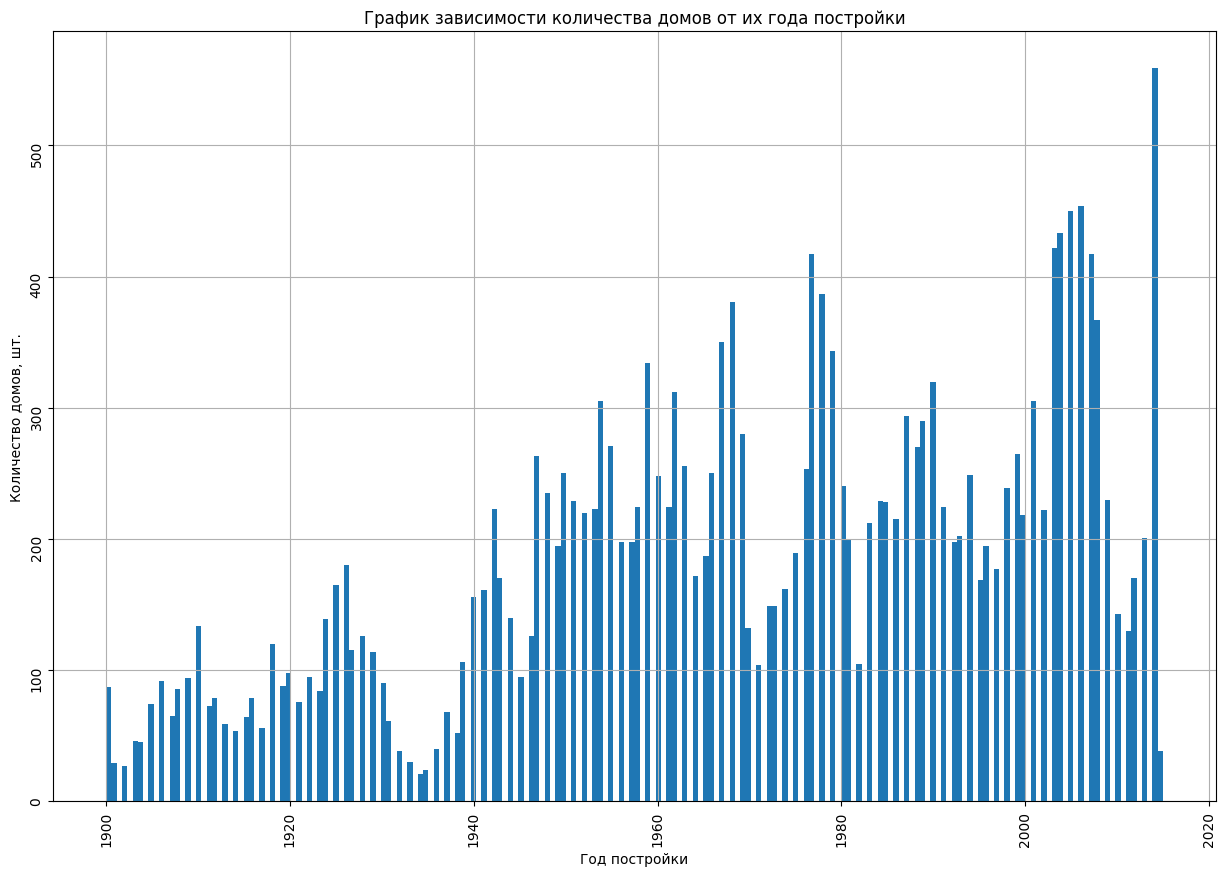

In [59]:
plt.figure(figsize=(15, 10))
# data = data1.groupby('yr_built')['price'].agg(count = 'count').reset_index().sort_values(by='yr_built')
# plt.plot(data['yr_built'], data['count'])
plt.hist(data1['yr_built'], bins=200)
plt.xlabel('Год постройки')
plt.ylabel('Количество домов, шт.')
plt.title('График зависимости количества домов от их года постройки')
plt.grid()
plt.xticks(rotation = 90)
plt.yticks(rotation = 90);

Вывод: по данному графику можно сказать, что с каждым годом количество новых построенных домов растет. Существуют незначительные просадки, можно сказать, что это растущая линейная зависимость.

2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

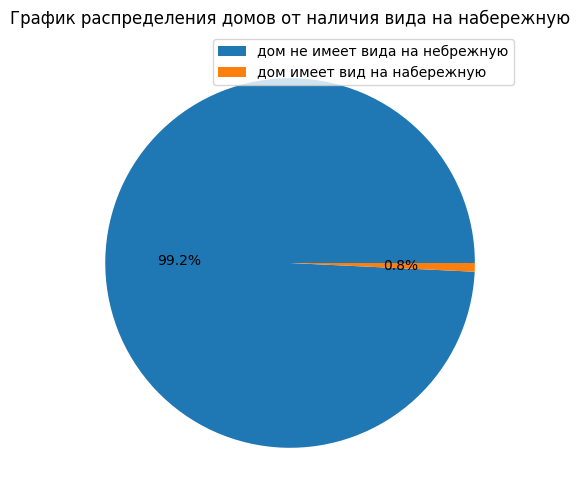

In [6]:
count = data1['waterfront'].value_counts()
plt.figure(figsize=(10, 6))
count.index = ['yes', 'no']
plt.pie(count, autopct='%1.1f%%')
plt.title('График распределения домов от наличия вида на набережную')
plt.legend(['дом не имеет вида на небрежную','дом имеет вид на набережную']);

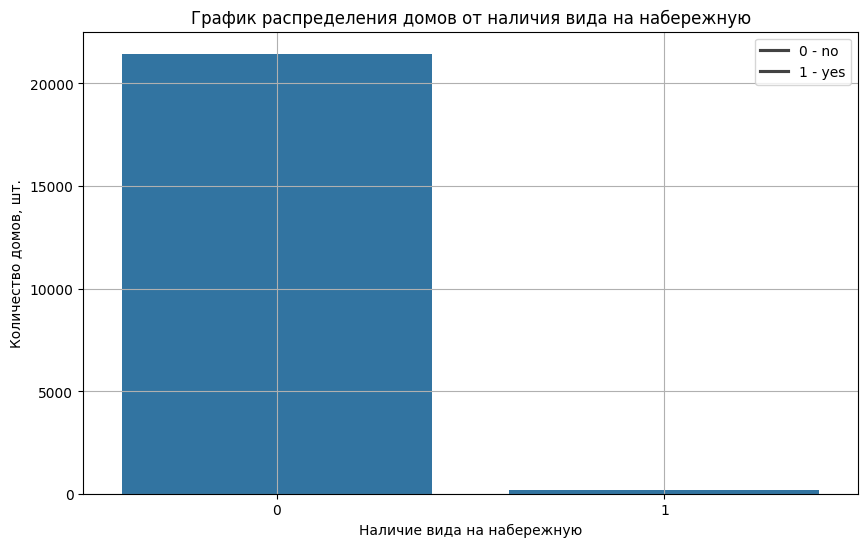

In [63]:
count = data1['waterfront'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Количество домов, шт.')
plt.title('График распределения домов от наличия вида на набережную')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.legend(['0 - no','1 - yes']);

<Figure size 1000x600 with 0 Axes>

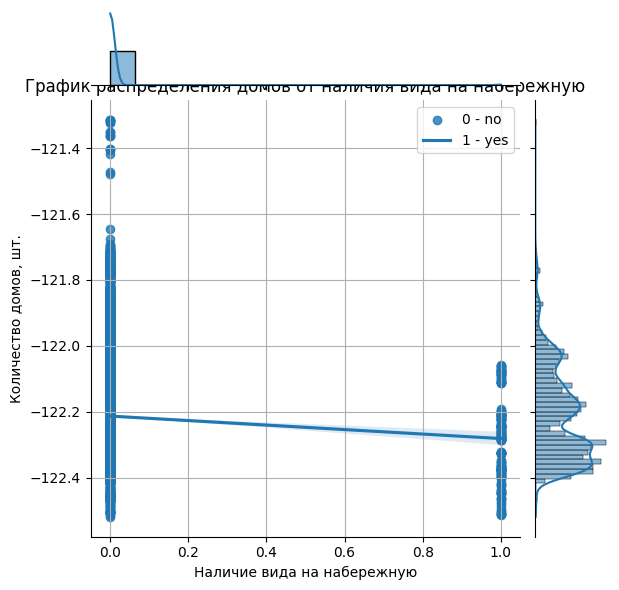

In [14]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data1['waterfront'], y=data1['long'],kind='reg')
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Долгота')
plt.title('График распределения домов от наличия вида на набережную')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.legend(['0 - no','1 - yes']);

Вывод: по данным графикам явно видно, что большинство домов не имеют вида на набережную. Дома с видом на набережную преимущественно находятся в районе -122.2 - 122.6 долготы. По пирогу очевидно, что 99,2% из всех рассматриваемых домов не имеют вида на набережную.

2.2. Изучите распределение этажей домов

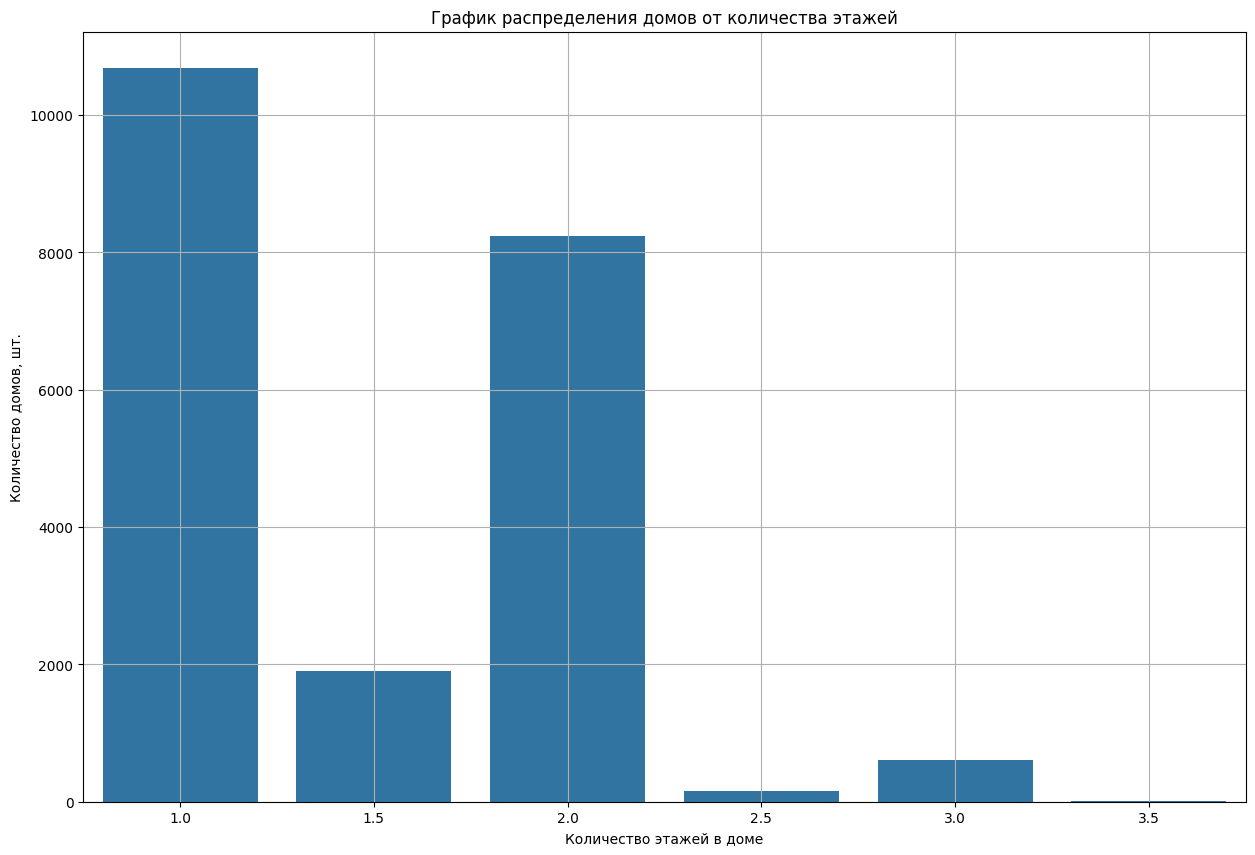

In [65]:
count = data1['floors'].value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество домов, шт.')
plt.title('График распределения домов от количества этажей')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 0);

Вывод: большинство домов имеют 1 этаж, также большое кошличество домов имеют 2 этажа.

In [ ]:
2.3. Изучите распределение состояния домов

<Figure size 1500x1000 with 0 Axes>

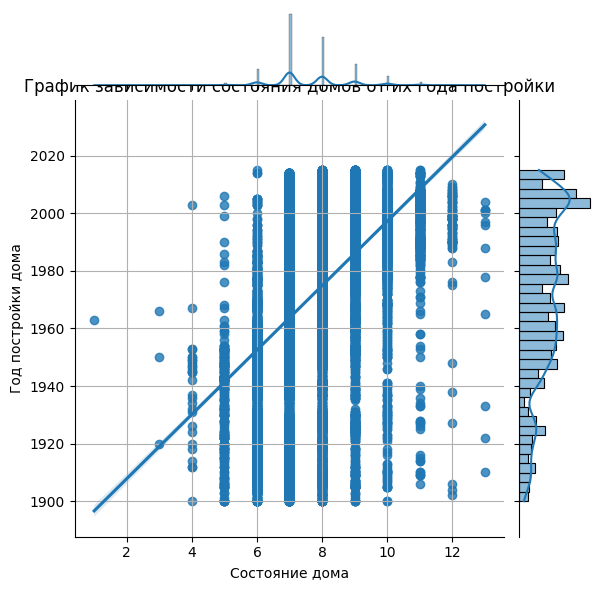

In [6]:
plt.figure(figsize=(15, 10))
sns.jointplot(x=data1['grade'], y=data1['yr_built'], kind='reg')
plt.xlabel('Состояние дома')
plt.ylabel('Год постройки дома')
plt.title('График зависимости состояния домов от их года постройки')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 0);

Вывод: большинство домов с состоянием от 5 до 9. Большинство домов в плохом состоянии имеют год постройки до 1960. В наилучшем состоянии дома, построенные после 1980 года.

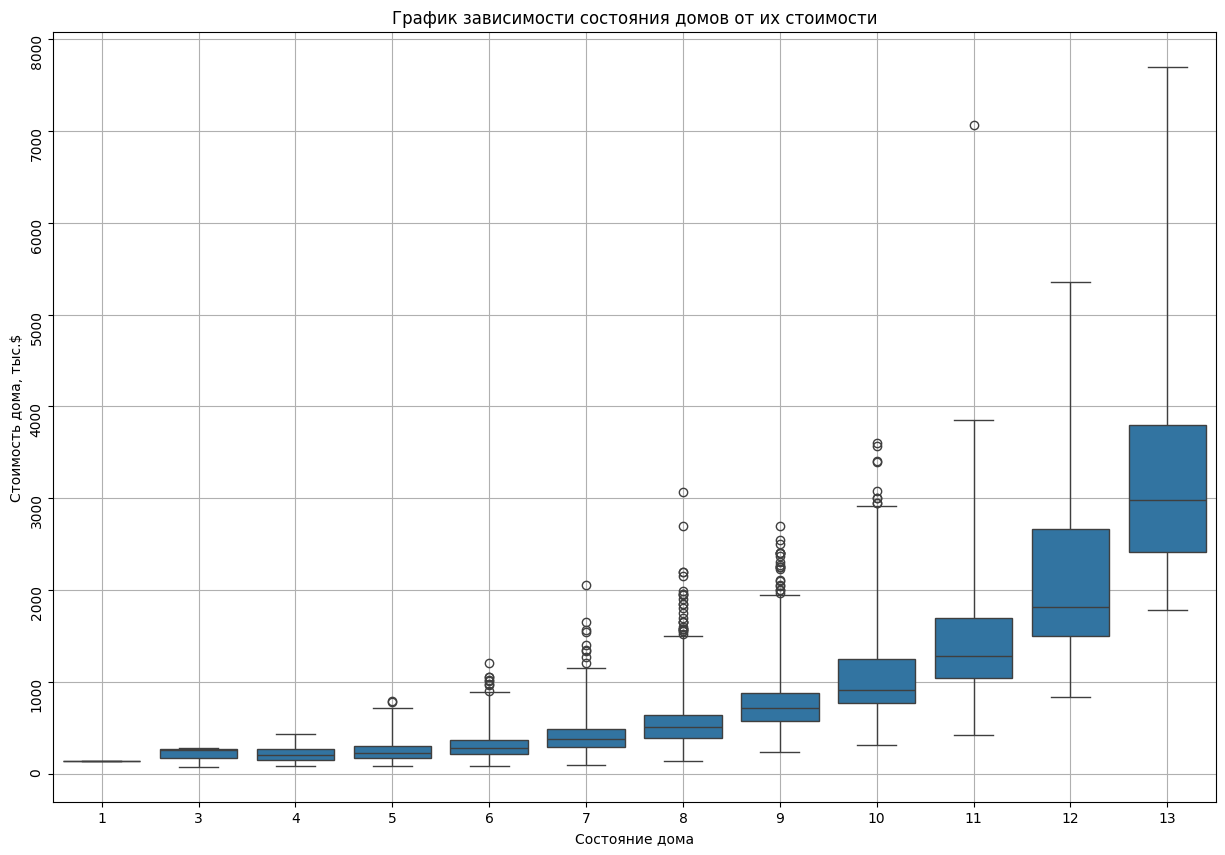

In [7]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=data1['grade'], y=data1['price']*0.001, whis=3.5)
plt.xlabel('Состояние дома')
plt.ylabel('Стоимость дома, тыс.$')
plt.title('График зависимости состояния домов от их стоимости')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 90);

Вывод: прямая растущая зависимость: чем лучше состояние дома, тем выше его цена.

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [16]:
# data1 = data1.drop(columns = 'date')
corr_matr = data1.corr()
# corr_matr = np.round(corr_matr, 1)
corr_matr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Не работало, пришлось удалить столбец data

<Axes: >

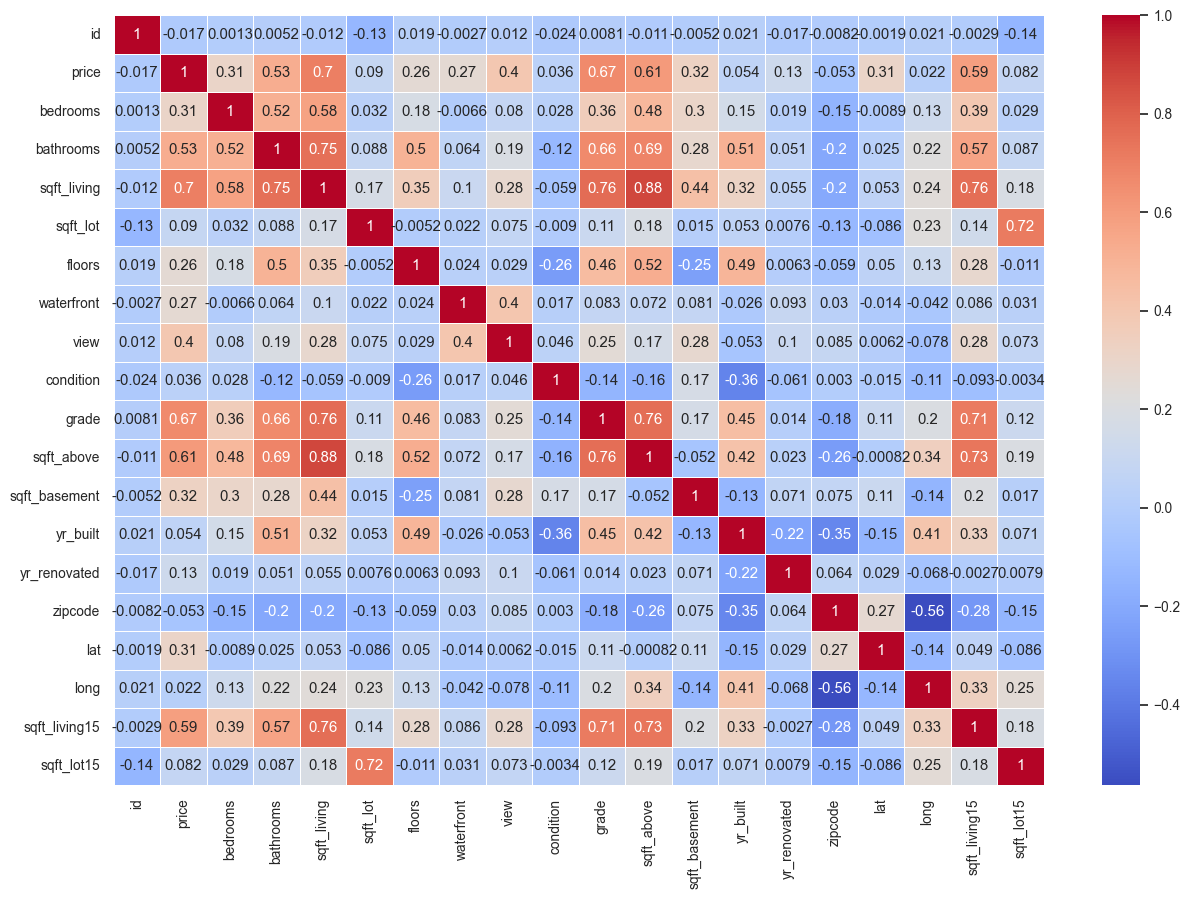

In [18]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = .9)
sns.heatmap(corr_matr, annot=True, linewidth=.5, cmap='coolwarm')

По данной тепловой карте можно выбрать столбцы, которые имеют наиболее явную зависимость со строкой price: bathrooms, sqft_living, grade, sqft_above, sqft_living15.

In [ ]:
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

<Figure size 1000x600 with 0 Axes>

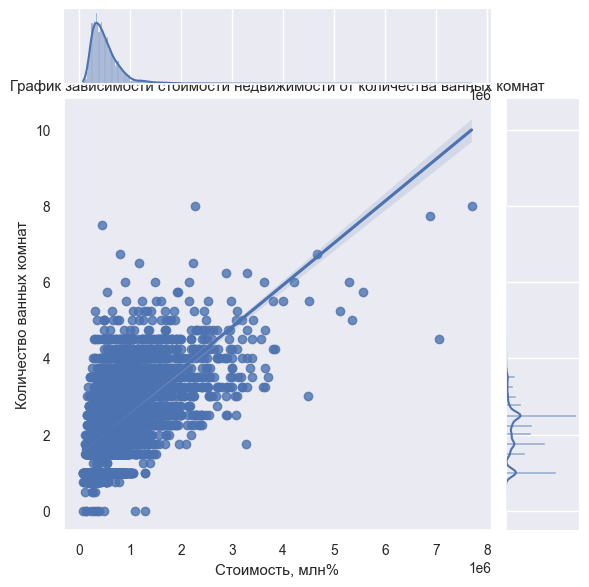

In [19]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data1['price'], y=data1['bathrooms'],kind='reg')
plt.xlabel('Стоимость, млн%')
plt.ylabel('Количество ванных комнат')
plt.title('График зависимости стоимости недвижимости от количества ванных комнат')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]),
 [Text(0, -2000.0, '−2000'),
  Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000'),
  Text(0, 16000.0, '16000')])

<Figure size 1000x600 with 0 Axes>

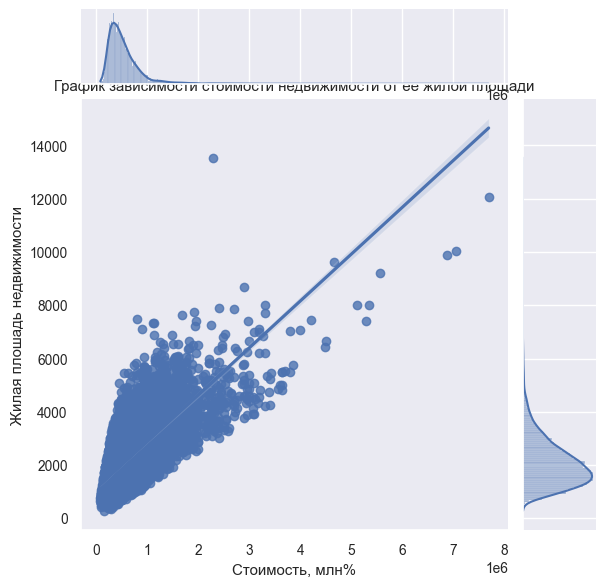

In [22]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data1['price'], y=data1['sqft_living'],kind='reg')
plt.xlabel('Стоимость, млн%')
plt.ylabel('Жилая плошадь недвижимости')
plt.title('График зависимости стоимости недвижимости от ее жилой площади')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25')])

<Figure size 1000x600 with 0 Axes>

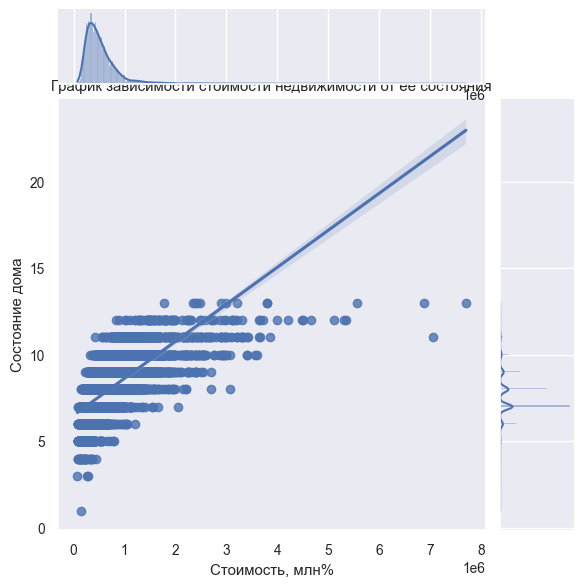

In [23]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data1['price'], y=data1['grade'],kind='reg')
plt.xlabel('Стоимость, млн%')
plt.ylabel('Состояние дома')
plt.title('График зависимости стоимости недвижимости от ее состояния')
plt.grid()
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

Вывод: по всем графикам можно сказать, что существует прямая зависимость стоимости дома от его состояния, жилой площади, общей площади и количества ванных комнат. Чем выше эти показатели, тем выше стоимость недвижимости.